In [39]:
%matplotlib notebook

In [138]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np

In [211]:
#Importing data
df = pd.read_csv('data/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df = df[['Date', 'Element', 'Data_Value']]

#Converting the temperatures to °C
df['Data_Value'] *= 0.1

#Modifying date format
df['Year'], df['Date'] = zip(*df['Date'].apply(lambda x: (x[:4], x[5:])))

#Taking out '02-29'
df = df[df['Date'] != '02-29']

#Creating dataframes with MIN and MAX temperatures
df_min = df[(df['Element'] == 'TMIN') & (df['Year'] != '2015')]
df_min = df_min.groupby(['Date']).aggregate({'Data_Value':np.min})

df_max = df[(df['Element'] == 'TMAX') & (df['Year'] != '2015')]
df_max = df_max.groupby(['Date']).aggregate({'Data_Value':np.max})

df_min15 = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')]
df_min15 = df_min15.groupby(['Date']).aggregate({'Data_Value':np.min})

df_max15 = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')]
df_max15 = df_max15.groupby(['Date']).aggregate({'Data_Value':np.max})

broken_max = np.where(df_max15['Data_Value'] > df_max['Data_Value'])
broken_min = np.where(df_min15['Data_Value'] < df_min['Data_Value'])

<IPython.core.display.Javascript object>


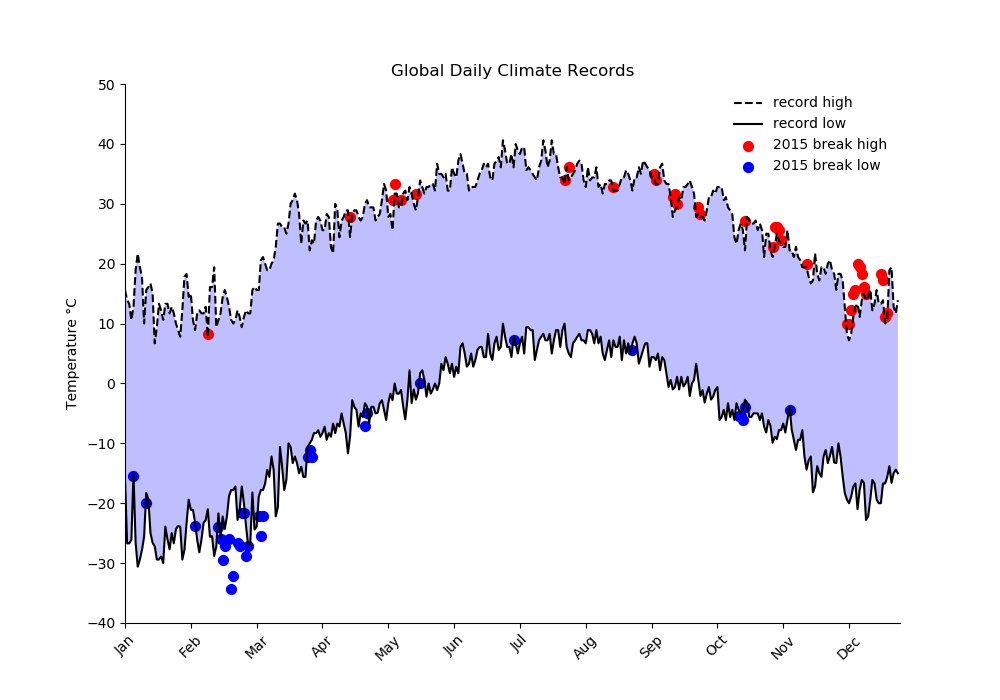

[0, 365, -40, 50]

In [212]:
plt.figure(figsize=(10,7))

#Lines
plt.plot(df_max.values, '--k', label='record high')
plt.plot(df_min.values, '-k', label='record low')
plt.fill_between(range(len(df_max)), df_max['Data_Value'], df_min['Data_Value'], facecolor='blue', alpha=0.25)

#Scatters
plt.scatter(broken_max, df_max15.iloc[broken_max], s=50, c='r', label='2015 break high')
plt.scatter(broken_min, df_min15.iloc[broken_min], s=50, c='b', label='2015 break low')

#Labels
plt.ylabel('Temperature °C')
plt.title('Global Daily Climate Records')

#Layout
plt.legend(frameon=False, loc=0)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(np.arange(0,365,31), ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], rotation=45)
plt.gca().axis([0,365,-40, 50]) 
